In [36]:
import pandas as pd
import glob

# Define the base path and the list of activities
base_path = '/Users/oe/BPS_Project/Graphene_BP/predictions_ada/'
activity_list = [
    'ShuffleCV_hgcp', 'NoShuffleCV_hgcp', 'SingleTrain_hgcp', 'SingleTrain_S1All_TestNextDay', 'NoShuffleCV_valsalva'
]

# Initialize a DataFrame to store the estimation errors for subject 1
subject_1_errors = pd.DataFrame()

# Iterate over activities for subject 1
for activity in activity_list:
    # Construct the file path for subject 1 for the current activity
    file_pattern = f'{base_path}/ADA_*/subject_id_1/*{activity}*mean_test.csv'
    file_paths = glob.glob(file_pattern)
    
    for file_path in file_paths:
        try:
            # Read the data from the CSV file
            df = pd.read_csv(file_path, usecols=[
                'Ref_data_DBP', 'Ref_data_SBP',
                'Predict_data_DBP', 'Predict_data_SBP'
            ])
            # Calculate estimation errors
            df['Estimation Error DBP'] = df['Predict_data_DBP'] - df['Ref_data_DBP']
            df['Estimation Error SBP'] = df['Predict_data_SBP'] - df['Ref_data_SBP']
            # Add the errors as new columns in the subject_1_errors DataFrame
            subject_1_errors[f'{activity} DBP Error'] = df['Estimation Error DBP']
            subject_1_errors[f'{activity} SBP Error'] = df['Estimation Error SBP']
        except FileNotFoundError:
            print(f'File not found: {file_path}')
        except pd.errors.EmptyDataError:
            print(f'No data in file: {file_path}')
        except Exception as e:
            print(f'An error occurred: {e}')

# count the number of rows by activity
subject_1_errors.count()


An error occurred: Usecols do not match columns, columns expected but not found: ['Predict_data_SBP', 'Ref_data_SBP', 'Predict_data_DBP', 'Ref_data_DBP']


ShuffleCV_hgcp DBP Error                    198
ShuffleCV_hgcp SBP Error                    198
NoShuffleCV_hgcp DBP Error                 1948
NoShuffleCV_hgcp SBP Error                 1948
SingleTrain_hgcp DBP Error                   94
SingleTrain_hgcp SBP Error                   94
SingleTrain_S1All_TestNextDay DBP Error     481
SingleTrain_S1All_TestNextDay SBP Error     481
NoShuffleCV_valsalva DBP Error              397
NoShuffleCV_valsalva SBP Error              397
dtype: int64

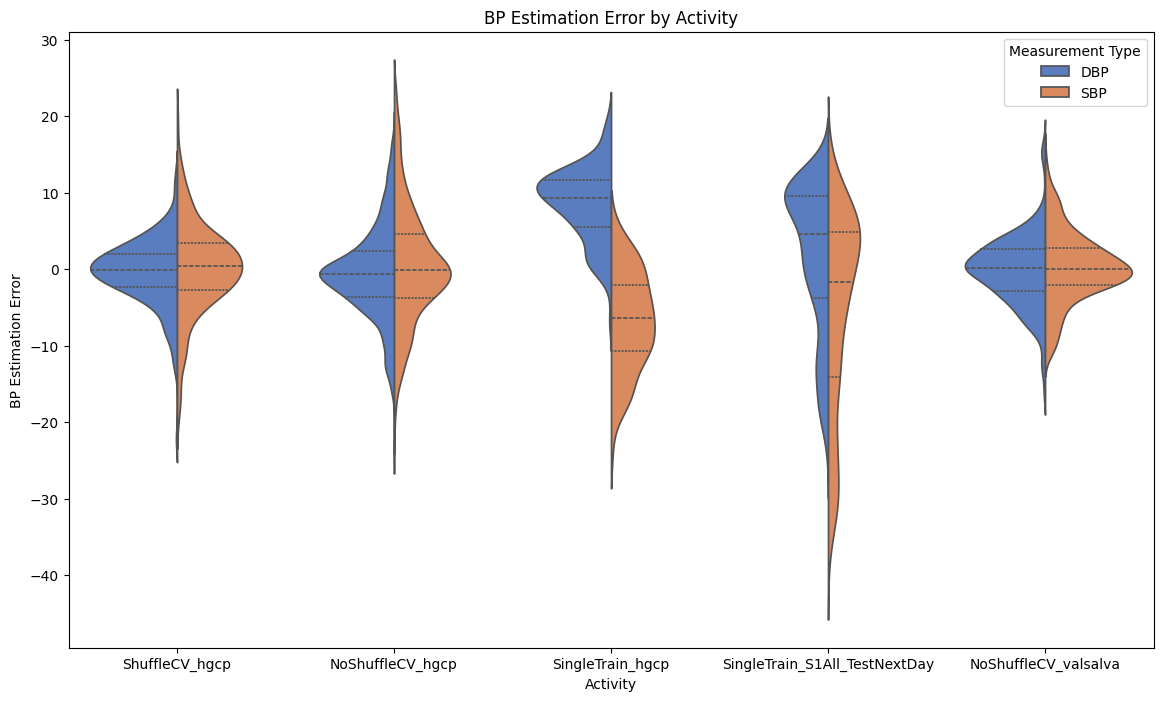

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame to have 'Activity', 'Type' (DBP/SBP), and 'Error' columns
melted_df = subject_1_errors.melt(var_name='Measurement', value_name='Error')

# Split the 'Measurement' into 'Activity' and 'Type'
melted_df['Activity'] = melted_df['Measurement'].apply(lambda x: x.split()[0])
melted_df['Type'] = melted_df['Measurement'].apply(lambda x: x.split()[1])

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Activity', y='Error', hue='Type', data=melted_df, split=True, inner='quart', palette='muted')

# Customize the plot to match the style in the image as closely as possible
plt.title('BP Estimation Error by Activity')
plt.ylabel('BP Estimation Error')
plt.xlabel('Activity')
plt.legend(title='Measurement Type')

# Show the plot
plt.show()


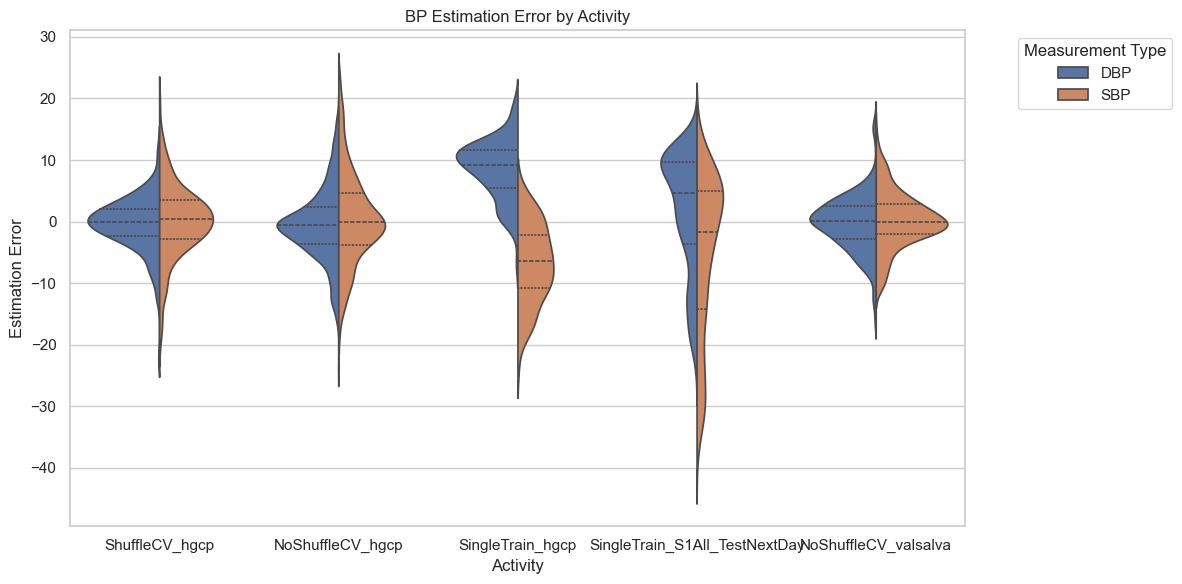

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'subject_1_errors' is a DataFrame that contains the estimation errors for subject 1
# and has been properly created with columns for each activity and error type (DBP, SBP)

# Melt the DataFrame to have 'Activity', 'Error Type', and 'Error' columns
melted_df = subject_1_errors.reset_index().melt(id_vars=['index'], var_name='Measurement', value_name='Error')
melted_df['Activity'] = melted_df['Measurement'].apply(lambda x: x.split()[0])
melted_df['Type'] = melted_df['Measurement'].apply(lambda x: 'DBP' if 'DBP' in x else 'SBP')

# Set the style of the visualization
sns.set(style="whitegrid")

# Draw the violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x='Activity', y='Error', hue='Type', split=True, inner='quart')

# Customize the plot
plt.title('BP Estimation Error by Activity')
plt.xlabel('Activity')
plt.ylabel('Estimation Error')

# Place the legend outside the plot
plt.legend(title='Measurement Type', bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()  # Adjust the layout so everything fits without overlapping
plt.show()



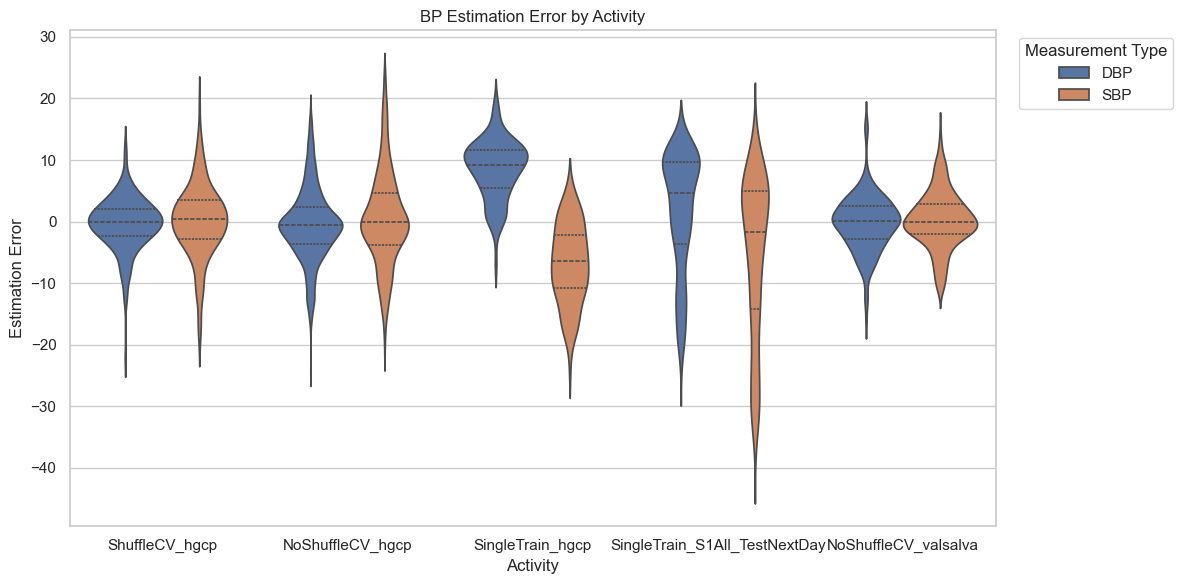

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'subject_1_errors' is a DataFrame that contains the estimation errors for subject 1
# and has been properly created with columns for each activity and error type (DBP, SBP)

# Melt the DataFrame to have 'Activity', 'Error Type', and 'Error' columns
melted_df = subject_1_errors.reset_index().melt(id_vars=['index'], var_name='Measurement', value_name='Error')
melted_df['Activity'] = melted_df['Measurement'].apply(lambda x: x.split()[0])
melted_df['Type'] = melted_df['Measurement'].apply(lambda x: x.split()[1])

# Set the style of the visualization
sns.set(style="whitegrid")

# Draw the violin plots side by side
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=melted_df, x='Activity', y='Error', hue='Type', inner='quart')

# Customize the plot
plt.title('BP Estimation Error by Activity')
plt.xlabel('Activity')
plt.ylabel('Estimation Error')

# Place the legend outside the plot
ax.legend(title='Measurement Type', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()  # Adjust the layout so everything fits without overlapping
plt.show()
